### Статистика по диссертациям### 

In [50]:
from clickhouse_driver.client import Client
import timeit
import datetime
import sqlite3 as lite
import pandas as pd


def stat_disser_old():
    date_1 = '2019-07-01'
    date_mass = []
    cur_day = 0
    while date_1 != str('2019-07-24'):
        cur_day = cur_day + 1
        cur_day_str = str(cur_day)
        if len(cur_day_str) == 1:
            cur_day_str = '0' + cur_day_str
        date_1 = date_1[:-2] + cur_day_str
        date_mass.append(date_1)

    client = Client('10.250.98.17', user='default')

    print('date\tdistinct_ip\tdistinct_document_view\tdocument_view')

    for date_2 in date_mass:
        result = client.execute('''
            SELECT
                COUNT(DISTINCT(ip)) 
            FROM
        	    logserver.nebpv
            WHERE
        	    date=''' + "'" + date_2 + "'" + ''' AND
        	    collection = 'disser' AND
        	    (method = 'RenderPageCustomSize' or method = 'PageGeometry' or method = 'RenderPage')
            ''')

        result_2 = client.execute('''
                    SELECT
                       COUNT(DISTINCT(document)) 
                    FROM
                	    logserver.nebpv
                    WHERE
                	    date=''' + "'" + date_2 + "'" + ''' AND
                	    collection = 'disser' AND
                	    (method = 'PageGeometry') 
                    ''')

        result_3 = client.execute('''
                            SELECT
                                DISTINCT(ip)
                            FROM
                        	    logserver.nebpv
                            WHERE
                        	    date=''' + "'" + date_2 + "'" + ''' AND
                        	    collection = 'disser' AND
                        	    (method = 'PageGeometry') 
                            ''')

        count_for_current = 0
        for i in result_3:
            result_4 = client.execute('''
                                        SELECT
                                            COUNT(DISTINCT(document))
                                        FROM
                                    	    logserver.nebpv
                                        WHERE
                                    	    date=''' + "'" + date_2 + "'" + ''' AND
                                    	    collection = 'disser' AND
                                    	    (method = 'RenderPageCustomSize' or method = 'PageGeometry' or method = 'RenderPage') AND
                                    	    ip = ''' + "'" + i[0] + "'")
            count_for_current = count_for_current + int(result_4[0][0])
            #print(date_2, i[0], count_for_current)

        #print(date_2 + '\t' + str(result[0][0]) + '\t' + str(result_2[0][0]) + '\t' + str(count_for_current))

def stat_disser_new():
    date_1 = '2019-07-25'
    date_mass = []
    cur_day = int(date_1[-2:])
    while date_1 != str('2019-07-31'):
        cur_day_str = str(cur_day)
        if len(cur_day_str) == 1:
            cur_day_str = '0' + cur_day_str
        date_1 = date_1[:-2] + cur_day_str
        date_mass.append(date_1)
        cur_day = cur_day + 1

    date_1 = '2019-08-01'
    cur_day = int(date_1[-2:])
    while date_1 != str('2019-08-31'):
        cur_day_str = str(cur_day)
        if len(cur_day_str) == 1:
            cur_day_str = '0' + cur_day_str
        date_1 = date_1[:-2] + cur_day_str
        date_mass.append(date_1)
        cur_day = cur_day + 1

    #print(date_mass)

    client = Client('10.250.98.17', user='default')

    print('date\tdistinct_vrr_id\tdistinct_document_view\tdocument_view')

    for date_2 in date_mass:
        result = client.execute('''
            SELECT
                COUNT(DISTINCT(vrr_id)) 
            FROM
        	    logserver.nebpv
            WHERE
        	    date=''' + "'" + date_2 + "'" + ''' AND
        	    collection = 'disser' AND
        	    (method = 'RenderPageCustomSize' or method = 'PageGeometry' or method = 'RenderPage') AND
        	    vrr_id != 0 
            ''')

        result_2 = client.execute('''
                    SELECT
                       COUNT(DISTINCT(document)) 
                    FROM
                	    logserver.nebpv
                    WHERE
                	    date=''' + "'" + date_2 + "'" + ''' AND
                	    collection = 'disser' AND
                	    (method = 'RenderPageCustomSize' or method = 'PageGeometry' or method = 'RenderPage') AND
        	                vrr_id != 0  
                    ''')

        result_3 = client.execute('''
                            SELECT
                                DISTINCT(vrr_id)
                            FROM
                        	    logserver.nebpv
                            WHERE
                        	    date=''' + "'" + date_2 + "'" + ''' AND
                        	    collection = 'disser' AND
                        	    (method = 'RenderPageCustomSize' or method = 'PageGeometry' or method = 'RenderPage') and vrr_id != 0
                        	                                ''')

        count_for_current = 0
        for i in result_3:
            result_4 = client.execute('''
                                                                    SELECT
                                                                        COUNT(DISTINCT(document))
                                                                    FROM
                                                                	    logserver.nebpv
                                                                    WHERE
                                                                	    date=''' + "'" + date_2 + "'" + ''' AND
                                                                	    collection = 'disser' AND
                                                                	    (method = 'RenderPageCustomSize' or method = 'PageGeometry' or method = 'RenderPage') and vrr_id=''' + str(i[0]))
            count_for_current = count_for_current + int(result_4[0][0])
            # print(date_2, i[0], count_for_current)


        print(date_2 + '\t' + str(result[0][0]) + '\t' + str(result_2[0][0]) + '\t' + str(count_for_current))


stat_disser_new()

date	distinct_vrr_id	distinct_document_view	document_view
2019-07-25	21	33	34
2019-07-26	16	21	21
2019-07-27	5	12	12
2019-07-28	5	7	7
2019-07-29	17	30	32
2019-07-30	16	28	29
2019-07-31	20	34	34
2019-08-01	12	14	15
2019-08-02	12	16	16
2019-08-03	6	35	35
2019-08-04	7	16	16
2019-08-05	22	37	37
2019-08-06	14	47	47
2019-08-07	15	23	24
2019-08-08	13	23	23
2019-08-09	17	39	39
2019-08-10	7	38	38
2019-08-11	1	1	1
2019-08-12	14	24	24
2019-08-13	15	20	20
2019-08-14	14	33	35
2019-08-15	11	21	23
2019-08-16	11	31	31
2019-08-17	9	10	10
2019-08-18	4	5	5
2019-08-19	16	21	21
2019-08-20	21	28	31
2019-08-21	0	0	0
2019-08-22	0	0	0
2019-08-23	0	0	0
2019-08-24	0	0	0
2019-08-25	0	0	0
2019-08-26	0	0	0
2019-08-27	0	0	0
2019-08-28	0	0	0
2019-08-29	0	0	0
2019-08-30	0	0	0
2019-08-31	0	0	0


***

### ОЭК: Количество проверяемых операторами ОТК документов в день###

In [19]:
import pymysql
import pandas as pd
connection = pymysql.connect(host='10.250.98.39',
                                 user='opit_reader',
                                 password='jkMZR4btU29sGKaa',
                                 db='copy_db',
                                 charset='utf8mb4',
                                 cursorclass=pymysql.cursors.DictCursor)
print("connect successful!!") 

l = []
cur = connection.cursor()
res2 = cur.execute('''select count(publ_document_id) as "verified docs(qty)", 
from_unixtime(created_at,  '%e %M %Y') as day
from publ_document_operations_log 
where from_unixtime(created_at,  '%M %Y') like '%May 2019'  and status='approved'
group by from_unixtime(created_at,  '%e %M %Y')
having count(publ_document_id)>2
order by created_at''')
for row in cur:
    l.append(row)
l = pd.DataFrame(l)
l




connect successful!!


,day,verified docs(qty)
0,6 May 2019,1047
1,7 May 2019,1434
2,8 May 2019,1259
3,13 May 2019,1860
4,14 May 2019,1141
5,15 May 2019,1318
6,16 May 2019,1443
7,17 May 2019,1624
8,20 May 2019,1842
9,21 May 2019,1409


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000210061B5EF0>]],
      dtype=object)

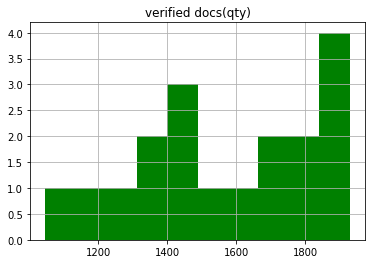

In [48]:
%matplotlib inline
l.hist(column = ['verified docs(qty)'], color = 'g')